In [3]:
#pip install Pillow
import gym
from PIL import Image
import numpy as np
from IPython.display import display, clear_output
import random
import time

In [98]:
env = gym.make('Taxi-v3', render_mode='rgb_array').env

In [89]:
state, _ = env.reset()
print(f'Estado atual: {state}')

Estado atual: 328


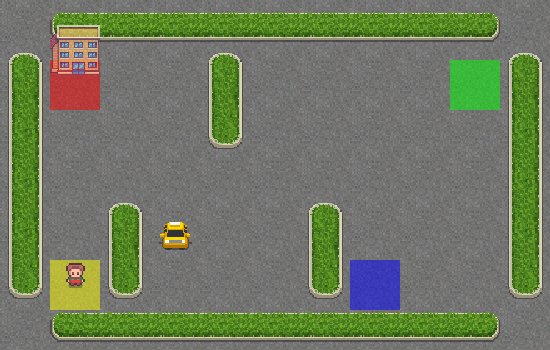

In [90]:
# Renderizar o ambiente
image = env.render()
# Converter a matriz RGB em uma imagem e exibi-la
img = Image.fromarray(np.array(image))
display(img)

In [7]:
#Espaço de ação
#4 direções (norte, sul, leste, oeste) e embarque e desembarque
print(f'Action Space {env.action_space}')

#Espaço de estados da grade (5 linhas e 5 colunas): 5 x 5 = 25
#Espaço de posições do passageiro (quatro pontos extenos ou dentro do taxi): 5 
#Espaço de posições de embarque/desenbarque: 4
#Resultado 25 x 5 x 4 = 500 espaços de estado
print(f'State Space {env.observation_space}')

Action Space Discrete(6)
State Space Discrete(500)


In [ ]:
#Recompensas
#+ 20 para um desenbarque correto
#-10 para um emb/desemb incorreto
#-1 para ações que não sejam as duas anteriores.

In [ ]:
#6 ações:
#0 - Sul
#1 - Norte
#2 - Leste
#3 - Oste
#4 - Embarque
#5 - Desembarque
env.P[328] # 328 de 500 estados possíveis. [(prob, proximo_estado, pontuação,boolean)] 

In [8]:
tabela_q = np.zeros([env.observation_space.n, env.action_space.n]) #500 linhas, 6 itens por linhas (6 ações para cada um dos 500 estados)

In [9]:
#Treinando o algoritmo
#Valores do modelo:

#A cada iteração do while, em cada uma das 500 linhas do array, o valor máximo, dentres as 6 de cada linha, 
#o qual dita a ação, é reconfigurado com a equação de Bellman. Após uma vitória, sai do laço e recomeça confi
#guração novamente

alpha = 0.1
gamma = 0.6
epsilon = 0.1 # 10% de chance de não seguir a tabela q e tomar uma ação aleatória.

for i in range(1, 200001):
    estado,_ = env.reset()
    
    interacoes, penalidades, recompensa = 0, 0, 0

    terminado = False

    while not terminado:
        if random.uniform(0, 1) < epsilon:# Decidindo se tomará uma ação aleatória.
            acao = env.action_space.sample()
        else:
            acao = np.argmax(tabela_q[estado])

        proximo_estado, recompensa, terminado, boolean, dict = env.step(acao)

        atual_maximo = tabela_q[estado, acao]        
        proximo_maximo = np.max(tabela_q[proximo_estado])
    
        #Atualizando o valor de q a partir da equação de Bellman
        novo_valor = (1 - alpha) * atual_maximo + alpha * (recompensa + gamma * proximo_maximo)
        #Colocando este valor na tabela_q
        tabela_q[estado, acao] = novo_valor

        if recompensa == -10:
            penalidades +=1

        estado = proximo_estado
        interacoes += 1

    if i % 100 == 0:
        clear_output(wait = True)
        print(f'Espisódio:{i}. Penalidaddes: {penalidades}. Episódios: {interacoes}.')
        
print('Concluído o treinamento.')

Iterações:200000. Penalidaddes: 2. Episódios: 17.
Concluído o treinamento.


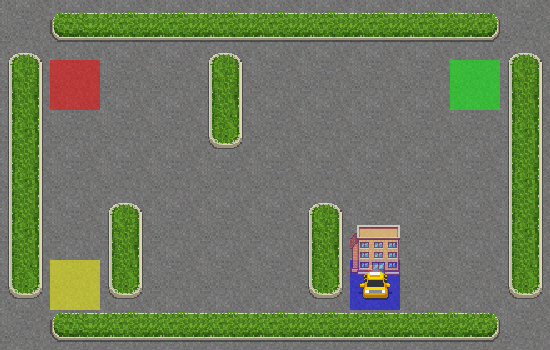

Episódios:  3
Penalidades:  0


In [105]:
total_penalidades = 0
episodios = 3
frames = []

for _ in range(episodios):
    estado,_ = env.reset()
    penalidades, recompensa = 0, 0
    done = False
   
    while not done:
        acao = np.argmax(tabela_q[estado])
        
        estado, recompensa, done, boolean, dict = env.step(acao)

        image = env.render()
        clear_output(wait = True)
        if image is not None:
            img = Image.fromarray(np.array(image))
            display(img)
            time.sleep(0.5)
        else:
            print("Erro ao renderizar o frame.")
        
        if recompensa == -10:
            penalidades+=1 
        
    total_penalidades += penalidades
    

print('Episódios: ', episodios)
print('Penalidades: ', total_penalidades)
        